In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
%matplotlib inline

**For import and local cases in Sg**

In [2]:
imported_df = pd.read_csv("datasets/Daily Imported.csv")

In [3]:
local_df = pd.read_csv("datasets/Daily Local.csv")

In [4]:
new_dates = imported_df[1:].keys()[1:]
new_dates

Index(['01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020',
       '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/01/2020',
       ...
       '09/10/2021', '09/11/2021', '09/12/2021', '09/13/2021', '09/14/2021',
       '09/15/2021', '09/16/2021', '09/17/2021', '09/18/2021', '09/19/2021'],
      dtype='object', length=606)

In [5]:
imported_cases = []
local_cases = []
imported_sum = 0
local_sum = 0

for date in new_dates:
    imported_sum += imported_df[date].sum()
    local_sum += local_df[date].sum()
    imported_cases.append(imported_sum)
    local_cases.append(local_sum)

In [6]:
imported_cases, local_cases

([1,
  3,
  4,
  4,
  5,
  7,
  10,
  13,
  16,
  18,
  18,
  18,
  20,
  21,
  21,
  21,
  21,
  21,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  23,
  23,
  23,
  23,
  23,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  25,
  27,
  29,
  30,
  33,
  33,
  41,
  46,
  55,
  64,
  73,
  84,
  101,
  134,
  158,
  188,
  227,
  245,
  293,
  325,
  363,
  391,
  413,
  454,
  478,
  487,
  503,
  523,
  531,
  540,
  546,
  550,
  551,
  554,
  556,
  559,
  559,
  559,
  559,
  559,
  559,
  559,
  559,
  560,
  560,
  560,
  560,
  560,
  560,
  560,
  560,
  560,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  562,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  563,
  564,
  564,
  564,
  564,
  564,
  564,
  564,
  564,
  5

In [7]:
days_since_1_23 = np.array([i for i in range(len(new_dates))]).reshape(-1, 1)

In [8]:
new_days_in_future = 10
new_future_forecast = np.array([i for i in range(len(new_dates)+new_days_in_future)]).reshape(-1, 1)
new_future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [9]:
new_start = '01/23/2020'
new_start_date = datetime.datetime.strptime(new_start, '%m/%d/%Y')
new_future_forecast_dates = []
for i in range(len(new_future_forecast)):
    new_future_forecast_dates.append((new_start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [10]:
new_future_forecast_dates

['01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/2020',
 '03/29/20

In [11]:
days_to_skip = 450
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_23[days_to_skip:], imported_cases[days_to_skip:], test_size=0.20, shuffle=False)

In [12]:
svm_imported = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_imported.fit(X_train_confirmed, y_train_confirmed)
svm_imported_pred = svm_imported.predict(new_future_forecast)

MAE: 190.66316151067804
MSE: 38410.35947648326


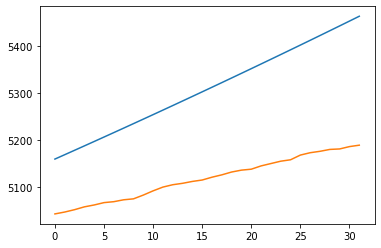

In [13]:
# check against testing data

svm_imported_test_pred = svm_imported.predict(X_test_confirmed)
plt.plot(svm_imported_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_imported_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_imported_test_pred, y_test_confirmed))

In [14]:
r2_score(y_test_confirmed, svm_imported_test_pred)

-17.835830079950263

In [15]:
# Imported Predictions for the next 10 days using SVM

print('SVM future predictions for imported cases:')
set(zip(new_future_forecast_dates[-10:], svm_imported_pred[-10:]))

SVM future predictions for imported cases:


{('09/20/2021', 5473.2184148971755),
 ('09/21/2021', 5483.575154418202),
 ('09/22/2021', 5493.966056937428),
 ('09/23/2021', 5504.391213053914),
 ('09/24/2021', 5514.850653285237),
 ('09/25/2021', 5525.344463462086),
 ('09/26/2021', 5535.872661704274),
 ('09/27/2021', 5546.435340041371),
 ('09/28/2021', 5557.032513732167),
 ('09/29/2021', 5567.66426193163)}